In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [18]:
df=pd.read_csv('C:\\Users\\pc\\Desktop\\bluebook-for-bulldozers\\TrainAndValid.csv',low_memory=False,parse_dates=["saledate"])

In [19]:
df_tmp=df.copy()

In [20]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [21]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [22]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

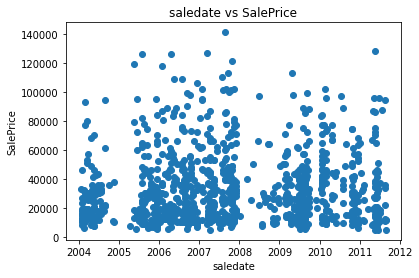

In [23]:
fig,ax=plt.subplots()
ax.scatter(df_tmp["saledate"][:1000],df_tmp["SalePrice"][:1000])
plt.xlabel("saledate")
plt.ylabel("SalePrice")
plt.title("saledate vs SalePrice")
plt.show()

<Axes: ylabel='Frequency'>

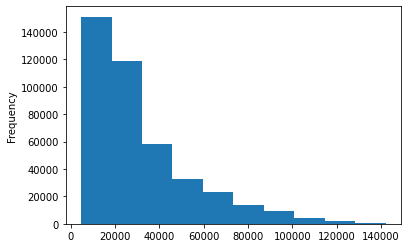

In [24]:
df_tmp.SalePrice.plot.hist()

In [25]:
#add date time paramter for data
df_tmp["SaleYear"]=df_tmp.saledate.dt.year
df_tmp["SaleMonth"]=df_tmp.saledate.dt.month
df_tmp["SaleDay"]=df_tmp.saledate.dt.day
df_tmp["SaleDayOfWeek"]=df_tmp.saledate.dt.dayofweek
df_tmp["SaleDayOfYear"]=df_tmp.saledate.dt.dayofyear

In [26]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [27]:
df_tmp.drop("saledate",axis=1,inplace=True)

In [28]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175


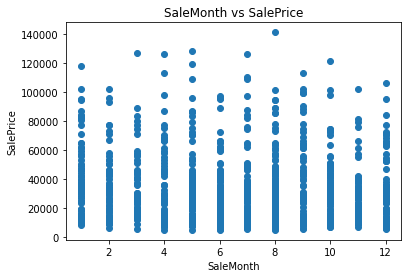

In [29]:
fig,ax=plt.subplots()
ax.scatter(df_tmp["SaleMonth"][:1000],df_tmp["SalePrice"][:1000])
plt.xlabel("SaleMonth")
plt.ylabel("SalePrice")
plt.title("SaleMonth vs SalePrice")
plt.show()

In [30]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [31]:
model=RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])
model.score(df_tmp.drop("saleprice",axis=1),df_tmp["saleprice"])

ValueError: could not convert string to float: 'Low'

In [32]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [33]:
### Convert string to catgories

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [34]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [35]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175


In [36]:
df_tmp["UsageBand"].dtype

CategoricalDtype(categories=['High', 'Low', 'Medium'], ordered=True)

In [37]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [38]:
df_tmp.state.cat.codes

0          0
1         32
2         31
3         43
4         31
          ..
412693    43
412694     8
412695     8
412696    43
412697     8
Length: 412698, dtype: int8

In [39]:
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [ ]:
df_tmp.to_csv('C:\\Users\\pc\\Desktop\\bluebook-for-bulldozers\\Pdata.csv')

In [40]:
df_tmp=pd.read_csv('C:\\Users\\pc\\Desktop\\bluebook-for-bulldozers\\Pdata.csv',low_memory=False)

In [41]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175


# Start Filling some Missing Values

In [42]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayOfWeek
SaleDayOfYear


In [43]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [44]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            df_tmp[label]=content.fillna(content.median())

In [45]:
df_tmp.isna().sum()/len(df_tmp)

SalesID                                0.000000
SalePrice                              0.000000
MachineID                              0.000000
ModelID                                0.000000
datasource                             0.000000
auctioneerID                           0.000000
YearMade                               0.000000
MachineHoursCurrentMeter               0.000000
UsageBand                              0.821492
fiModelDesc                            0.000000
fiBaseModel                            0.000000
fiSecondaryDesc                        0.340993
fiModelSeries                          0.857845
fiModelDescriptor                      0.818715
ProductSize                            0.524851
fiProductClassDesc                     0.000000
state                                  0.000000
ProductGroup                           0.000000
ProductGroupDesc                       0.000000
Drive_System                           0.740520
Enclosure                              0

In [46]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"]=pd.isnull(content)
        df_tmp[label]=pd.Categorical(content).codes+1

In [47]:
df_tmp["auctioneerID_is_missing"].value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [48]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,False,False,True,True,True


In [49]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [50]:
%time
model=RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

Wall time: 0 ns


0.9875471593700775

# Split data into train/validation sets

In [51]:
df_tmp.SaleYear

0         2006
1         2004
2         2004
3         2011
4         2009
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: SaleYear, Length: 412698, dtype: int64

In [52]:
df_tmp.SaleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: SaleYear, dtype: int64

In [53]:
df_val=df_tmp[df_tmp.SaleYear==2012]
df_train=df_tmp[df_tmp.SaleYear!=2012]

In [54]:
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val["SalePrice"] 

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [55]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

# Building an evaluation function 

In [56]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error
def rmlse(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))


In [57]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [58]:
show_scores(model)

{'Training MAE': 1578.452360361484,
 'Valid MAE': 6125.117301477577,
 'Training RMSLE': 0.0841335910166914,
 'Valid RMSLE': 0.2546446969689846,
 'Training R^2': 0.9875229075349308,
 'Valid R^2': 0.8724699827023497}

# Testing our model on a subset for tuning hyperparamters 

In [59]:
len(X_train)

401125

In [60]:
%%time
model=RandomForestRegressor(n_jobs=-1,random_state=42, max_samples=10000)
model.fit(X_train,y_train)


Wall time: 20.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [61]:
show_scores(model)

{'Training MAE': 5554.061618822063,
 'Valid MAE': 7139.615822172297,
 'Training RMSLE': 0.25758465681614984,
 'Valid RMSLE': 0.29248380187626777,
 'Training R^2': 0.8608402371243158,
 'Valid R^2': 0.83308596217853}

# Hyperparamter tuning with RandomizedSearchCV

In [62]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],   
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt"],
           "max_samples": [10000]}

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                           param_distributions=rf_grid,
                           n_iter=2,
                           cv=5,
                           verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 1min 17s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [63]:
show_scores(rs_model)

{'Training MAE': 11842.524080498659,
 'Valid MAE': 13430.335675582855,
 'Training RMSLE': 0.5072714283204101,
 'Valid RMSLE': 0.5084518446379276,
 'Training R^2': 0.4860799041841286,
 'Valid R^2': 0.4914921467480772}

In [64]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 3}

In [65]:
%%time

ideal_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None,
                                 random_state=42)
ideal_model.fit(X_train,y_train)

Wall time: 1min 4s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [66]:
show_scores(ideal_model)

{'Training MAE': 2951.123355082265,
 'Valid MAE': 5966.934781951541,
 'Training RMSLE': 0.144427431435229,
 'Valid RMSLE': 0.246251621813037,
 'Training R^2': 0.9589090179371786,
 'Valid R^2': 0.8819835895768973}

In [67]:
df_test=pd.read_csv('C:\\Users\\pc\\Desktop\\bluebook-for-bulldozers\\Test.csv',low_memory=False,parse_dates=["saledate"])


ValueError: Missing column provided to 'parse_dates': 'saledate'

In [ ]:
df_test.head().T

In [ ]:
def preprocess_data(df):
    # Add datetime parameters for saledate
    df_test["SaleYear"]=df_test.saledate.dt.year
    df_test["SaleMonth"]=df_test.saledate.dt.month
    df_test["SaleDay"]=df_test.saledate.dt.day
    df_test["SaleDayOfWeek"]=df_test.saledate.dt.dayofweek
    df_test["SaleDayOfYear"]=df_test.saledate.dt.dayofyear
    df_test.drop("saledate",axis=1,inplace=True)
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [ ]:
df_test = preprocess_data(df_test)
df_test.head()

In [ ]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

In [ ]:
# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in df_test.columns:
    df_test = df_test.drop(columns=['Unnamed: 0'])

# Now, you can safely compare the columns
columns_diff = set(X_train.columns) - set(df_test.columns)
print(columns_diff)


In [ ]:
# Strip any potential whitespace around column names
df_test.columns = df_test.columns.str.strip()
if 'Unnamed: 0' in df_test.columns:
    df_test = df_test.drop(columns=['Unnamed: 0'])


In [ ]:
columns_diff = set(X_train.columns) - set(df_test.columns)
print(columns_diff)


In [ ]:
# Match test dataset columns to training dataset
df_test["auctioneerID_is_missing"] = False
df_test.head()

In [ ]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)

In [ ]:
show_scores(ideal_model)

In [ ]:
# Match column order from X_train to df_test (to predict on columns, they should be in the same order they were fit on)
df_test = df_test[X_train.columns]

In [ ]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(df_test)
test_preds

In [ ]:
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalesPrice"]=test_preds
df_preds

In [ ]:
# Export prediction data
df_preds.to_csv("C:\\Users\\pc\\Desktop\\bluebook-for-bulldozers\\predTest.csv",index=False)

# Feature Importance

In [71]:
ideal_model.feature_importances_

array([3.34924470e-02, 1.64748353e-02, 4.47004352e-02, 1.69028377e-03,
       3.28858493e-03, 2.02782264e-01, 3.13875078e-03, 9.83191106e-04,
       4.15237625e-02, 4.07149610e-02, 6.61902591e-02, 5.09205417e-03,
       1.78327762e-02, 1.49841216e-01, 4.75075898e-02, 5.96117040e-03,
       2.83186429e-03, 4.15283561e-03, 3.46774099e-03, 6.85760750e-02,
       6.46055813e-04, 8.22926053e-05, 7.84347964e-04, 2.50278281e-04,
       1.07596596e-03, 3.10663583e-04, 2.81785595e-03, 8.33504813e-03,
       8.27324018e-04, 2.31225006e-03, 3.67230453e-03, 8.23599337e-04,
       4.55895657e-03, 3.28528090e-04, 4.40520420e-03, 6.38225129e-03,
       8.20417927e-04, 1.21731513e-02, 2.59122437e-03, 2.22091122e-03,
       1.77194684e-03, 9.70894732e-04, 3.71483557e-03, 6.29108698e-04,
       4.29867961e-04, 3.51248285e-04, 6.65265644e-04, 1.64121118e-03,
       1.20260513e-03, 2.31213148e-04, 3.35331494e-04, 7.34100766e-02,
       3.76162877e-03, 5.65047051e-03, 2.90594983e-03, 9.92965774e-03,
      

In [72]:
def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({"features":columns,
                      "feature_importance":importances}).sort_values("feature_importance",ascending=False).reset_index(drop=True))
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["feature_importance"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()


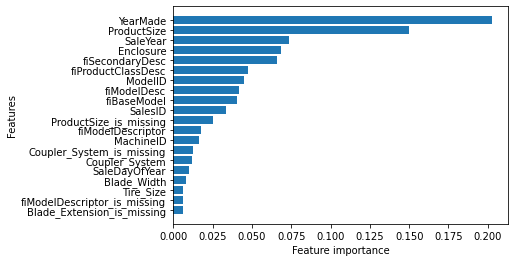

In [74]:
plot_features(X_train.columns,ideal_model.feature_importances_)